In [1]:
import pandas as pd
from merlion.utils import TimeSeries

# 加载数据
air_pass = pd.read_csv("data/airline-passengers.csv")
# 把日期设置为索引
air_pass.set_index('Month', inplace=True)
air_pass.index = pd.to_datetime(air_pass.index)
# 一定要确保freq设定好
air_pass.index.freq = 'MS'

# 读取为TimeSeries对象
air_pass_ts = TimeSeries.from_pd(air_pass, freq='MS')
print(air_pass_ts.is_aligned)

# 使用 .bisect() 函数切分数据为训练集和测试集
# 我们希望预估未来6个月的乘客量
air_pass_ts_train, air_pass_ts_test = air_pass_ts.bisect('1960-07-01')

True


In [2]:
from merlion.models.automl.autosarima import AutoSarima, AutoSarimaConfig
sarima_config = AutoSarimaConfig(auto_pqPQ=True, auto_d=True, auto_D=True, auto_seasonality=True,
                           approximation=True, maxiter=5)
sarima = AutoSarima(sarima_config)
# 模型训练
train_pred, train_err = sarima.train(
    air_pass_ts_train, train_config={"enforce_stationarity": True,
                              "enforce_invertibility": True}
)
sarima_fc = sarima.forecast(air_pass_ts_test.time_stamps)

Inferred granularity <MonthBegin>


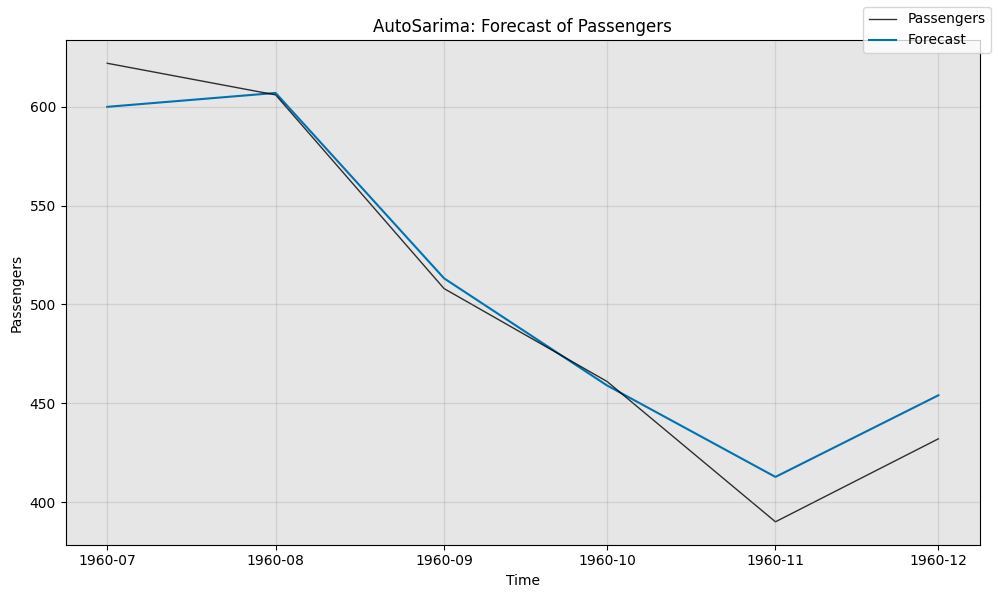

In [3]:
import matplotlib.pyplot as plt
fig, ax = sarima.plot_forecast(time_series=air_pass_ts_test)
plt.show()